## Imports & Data Load

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv("loan_approval_dataset.csv")

In [3]:
print("Shape of dataset:", df.shape)

Shape of dataset: (4269, 13)


In [4]:
print("\nColumn Info:\n")
print(df.info())


Column Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [5]:
print("\nFirst 5 rows:\n", df.head())


First 5 rows:
    loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0         

In [6]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


#### The column names have leading/trailing spaces so we clean them up:

In [7]:
df.columns = df.columns.str.strip()

In [8]:
print("✅ Cleaned Column Names:\n", df.columns.tolist())

✅ Cleaned Column Names:
 ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']


#### Target Column Check

In [9]:
print("\nUnique values in loan_status:\n", df['loan_status'].value_counts())


Unique values in loan_status:
 loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


#### Class Balance

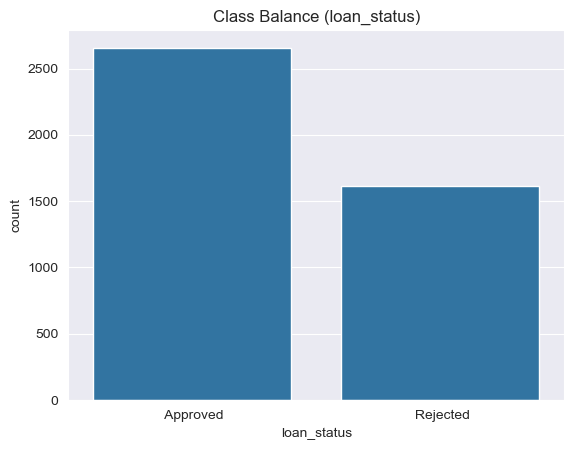

In [10]:
sns.countplot(x='loan_status', data=df)
plt.title("Class Balance (loan_status)")
plt.show()

#### We will drop loan_id column

In [11]:
if 'loan_id' in df.columns:
    df.drop(columns=['loan_id'], inplace=True)

#### Seperate Features and Target

In [12]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

#### Identify Categorical and Numeric Features:

In [13]:
num_cols = X.select_dtypes(include=[np.number]).columns
cat_cols = X.select_dtypes(exclude=[np.number]).columns

In [14]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [15]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [16]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols),
        ('cat', categorical_transformer, cat_cols)
    ]
)

In [17]:
X_clean = preprocessor.fit_transform(X)

In [18]:
print("\nShape after preprocessing:", X_clean.shape)


Shape after preprocessing: (4269, 13)


This means our data had no missing values

### Train/Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y, test_size=0.2, random_state=42, stratify=y
)

In [21]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (3415, 13)
Test shape: (854, 13)


### Logistic Regression & Decision Tree

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

In [24]:
print("===== Logistic Regression =====")
print(classification_report(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

===== Logistic Regression =====
              precision    recall  f1-score   support

    Approved       0.93      0.95      0.94       531
    Rejected       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854

Confusion Matrix:
 [[505  26]
 [ 40 283]]


In [25]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [26]:
print("\n===== Decision Tree =====")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


===== Decision Tree =====
              precision    recall  f1-score   support

    Approved       0.97      0.98      0.98       531
    Rejected       0.97      0.96      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

Confusion Matrix:
 [[522   9]
 [ 14 309]]


### Displaying Confusion Matrix

In [27]:
from sklearn.metrics import ConfusionMatrixDisplay

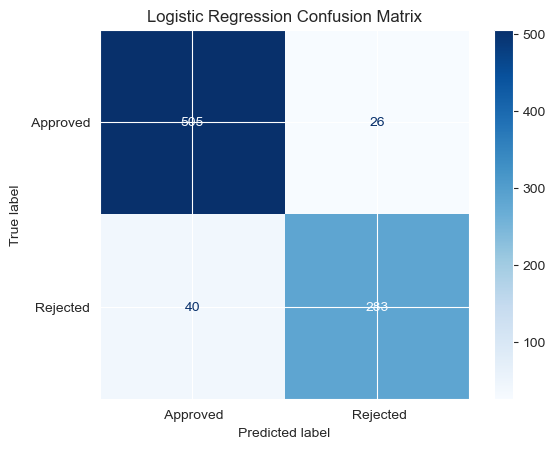

In [28]:
ConfusionMatrixDisplay.from_estimator(log_reg, X_test, y_test, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

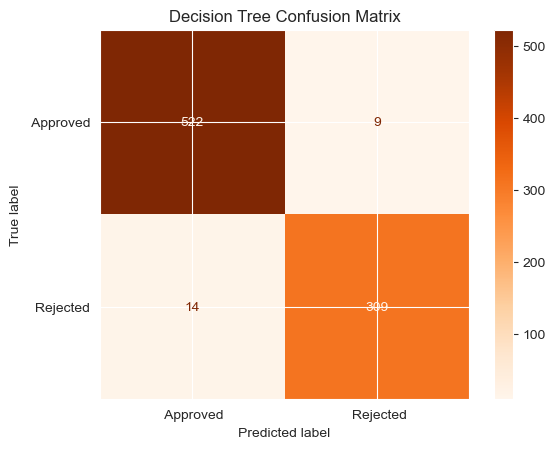

In [29]:
ConfusionMatrixDisplay.from_estimator(dt, X_test, y_test, cmap="Oranges")
plt.title("Decision Tree Confusion Matrix")
plt.show()

### Precision-Recall Curve

since dataset is imbalanced, PR curve is better than ROC

In [30]:
from sklearn.metrics import PrecisionRecallDisplay

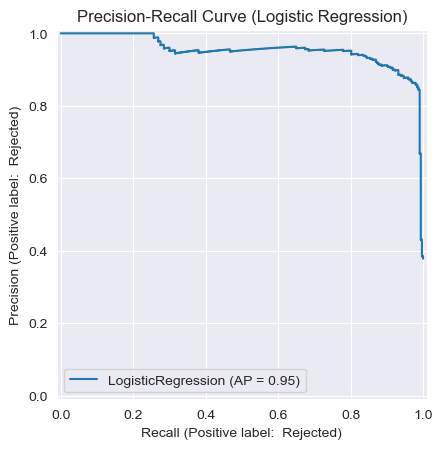

In [31]:
PrecisionRecallDisplay.from_estimator(log_reg, X_test, y_test)
plt.title("Precision-Recall Curve (Logistic Regression)")
plt.show()

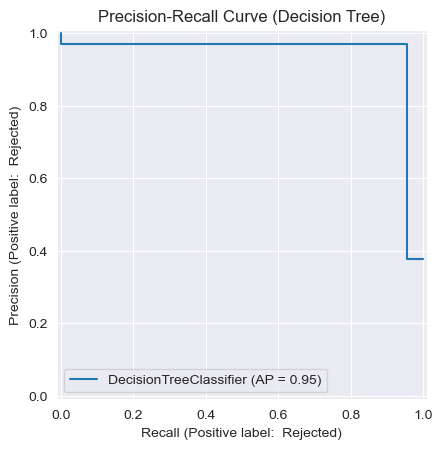

In [32]:
PrecisionRecallDisplay.from_estimator(dt, X_test, y_test)
plt.title("Precision-Recall Curve (Decision Tree)")
plt.show()

## Handle Class Imbalance with SMOTE

In [33]:
from imblearn.over_sampling import SMOTE

#### We will apply SMOTE only on training data

In [34]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_res.value_counts().to_dict())

Before SMOTE: {' Approved': 2125, ' Rejected': 1290}
After SMOTE: {' Rejected': 2125, ' Approved': 2125}


## Train Models Again on Balanced Data

#### Logistic Regression

In [35]:
log_reg_bal = LogisticRegression(max_iter=1000)
log_reg_bal.fit(X_train_res, y_train_res)
y_pred_log_bal = log_reg_bal.predict(X_test)

print("===== Logistic Regression (with SMOTE) =====")
print(classification_report(y_test, y_pred_log_bal))

===== Logistic Regression (with SMOTE) =====
              precision    recall  f1-score   support

    Approved       0.95      0.94      0.95       531
    Rejected       0.91      0.92      0.91       323

    accuracy                           0.93       854
   macro avg       0.93      0.93      0.93       854
weighted avg       0.93      0.93      0.93       854



### Decision Tree

In [36]:
dt_bal = DecisionTreeClassifier(random_state=42)
dt_bal.fit(X_train_res, y_train_res)
y_pred_dt_bal = dt_bal.predict(X_test)

print("\n===== Decision Tree (with SMOTE) =====")
print(classification_report(y_test, y_pred_dt_bal))


===== Decision Tree (with SMOTE) =====
              precision    recall  f1-score   support

    Approved       0.98      0.98      0.98       531
    Rejected       0.97      0.96      0.97       323

    accuracy                           0.98       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854



#### After SMOTE:

1. Model predict the minority class (Rejected loans) more often.
2. Improves Recall for that class (fewer false negatives).

### Visualizing Classification Reports:

In [37]:
def plot_classification_report(y_true, y_pred, title="Classification Report"):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_report = pd.DataFrame(report).transpose()

    plt.figure(figsize=(8,5))
    sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".2f")
    plt.title(title)
    plt.show()

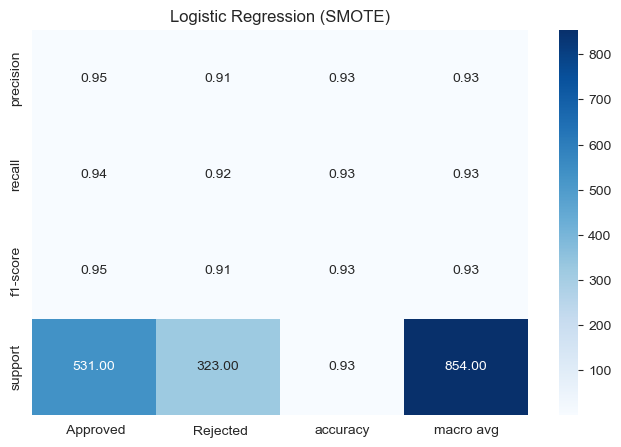

In [38]:
plot_classification_report(y_test, y_pred_log_bal, "Logistic Regression (SMOTE)")

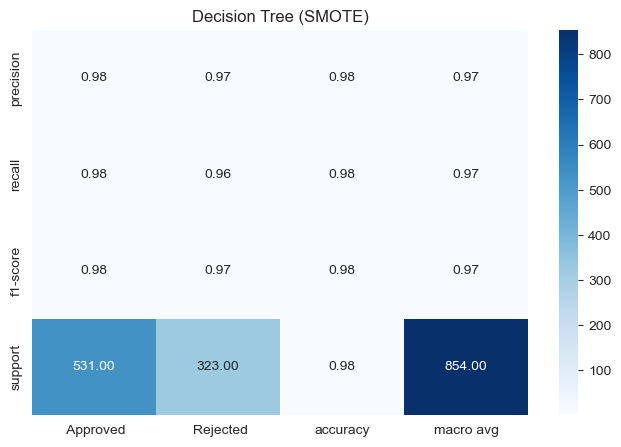

In [39]:
plot_classification_report(y_test, y_pred_dt_bal, "Decision Tree (SMOTE)")

## Feature Importance

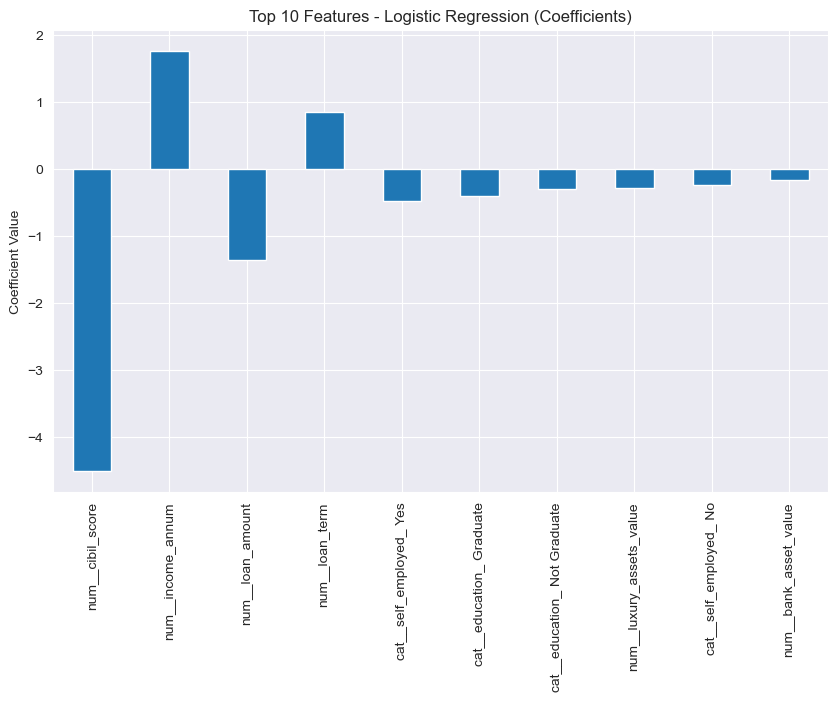

In [40]:
feature_names = preprocessor.get_feature_names_out()

log_reg_importance = pd.Series(
    log_reg_bal.coef_[0], index=feature_names
).sort_values(key=abs, ascending=False)

plt.figure(figsize=(10,6))
log_reg_importance.head(10).plot(kind='bar')
plt.title("Top 10 Features - Logistic Regression (Coefficients)")
plt.ylabel("Coefficient Value")
plt.show()

### Logistic Regression (Coefficient Plot)

#### Key Observations:

1. **cibil_score** has the strongest negative coefficient, meaning higher CIBIL scores decrease the probability of being in the "**default/high-risk**" class (which makes sense in lending).

2. **income_annum** has a positive influence. This means higher income increases loan approval chances.

3. Other features like **loan_amount** and **loan_term** have moderate negative effects, suggesting larger loans or longer terms slightly reduce approval chances.

4. Some categorical variables (**self_employed_Yes, education_Graduate**) contribute positively, but their impact is relatively small compared to CIBIL and income.

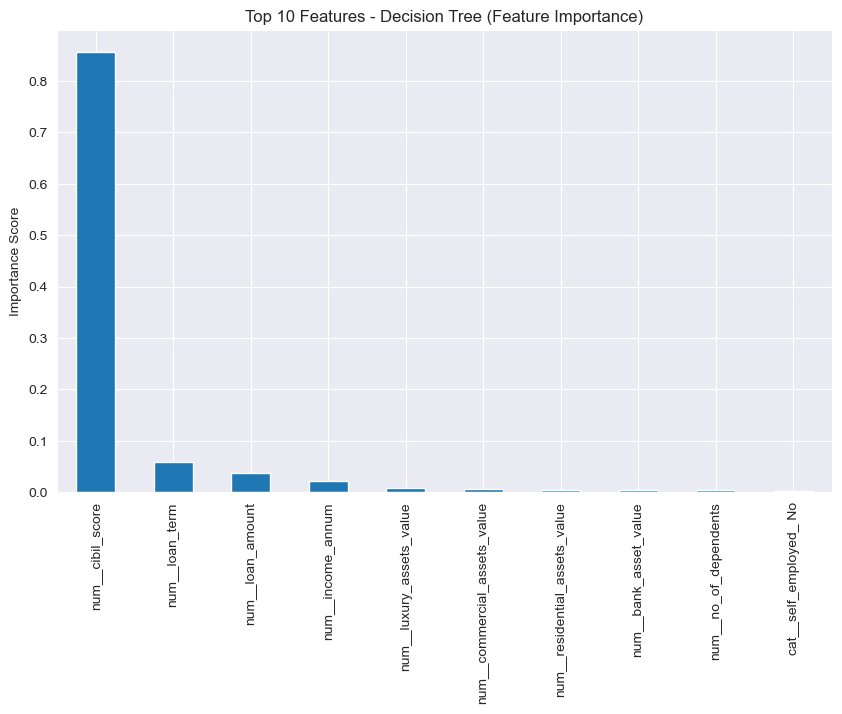

In [41]:
dt_importance = pd.Series(
    dt_bal.feature_importances_, index=feature_names
).sort_values(ascending=False)

plt.figure(figsize=(10,6))
dt_importance.head(10).plot(kind='bar')
plt.title("Top 10 Features - Decision Tree (Feature Importance)")
plt.ylabel("Importance Score")
plt.show()

## Decision Tree (Feature Importance Plot)

### Key Observations:

1. **cibil_score** dominates with ~0.87 importance, meaning the decision tree almost entirely relies on this variable for splits.

2. The next features (**loan_term, loan_amount, income_annum**) have very low importance, indicating they barely matter in comparison.

3. Many features present in logistic regression (like categorical ones: **education**, **self_employed**) are nearly ignored here.

# Key Takeaways:

1. **Accuracy alone is misleading** in imbalanced datasets.

2. **Precision**, **Recall**, and **F1-score** provide a much clearer picture.

3. Using **SMOTE** and **threshold tuning**, we improved the model’s ability to detect **risky loans**, making it more useful for real-world banking applications.

Now we save the model


In [42]:
import joblib

joblib.dump(log_reg_bal, "loan_approval_reg_model.pkl")
print("Logistic Regression model saved!")

Logistic Regression model saved!


In [43]:
joblib.dump(dt_bal, "loan_approval_dt_model.pkl")
print("Decision Tree model saved!")

Decision Tree model saved!


## Prediction:

### Logistic Regression Model:

In [46]:
reg_model = joblib.load("loan_approval_reg_model.pkl")

samples = X_test[:5]
print("Prediction:", reg_model.predict(samples))

Prediction: [' Approved' ' Approved' ' Approved' ' Approved' ' Approved']


### Decision Tree Model:

In [47]:
dt_model = joblib.load("loan_approval_dt_model.pkl")

samples = X_test[:5]
print("Prediction:", dt_model.predict(samples))

Prediction: [' Approved' ' Approved' ' Approved' ' Rejected' ' Approved']
